<a href="https://colab.research.google.com/github/debashis-das/cnn_research/blob/main/face_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

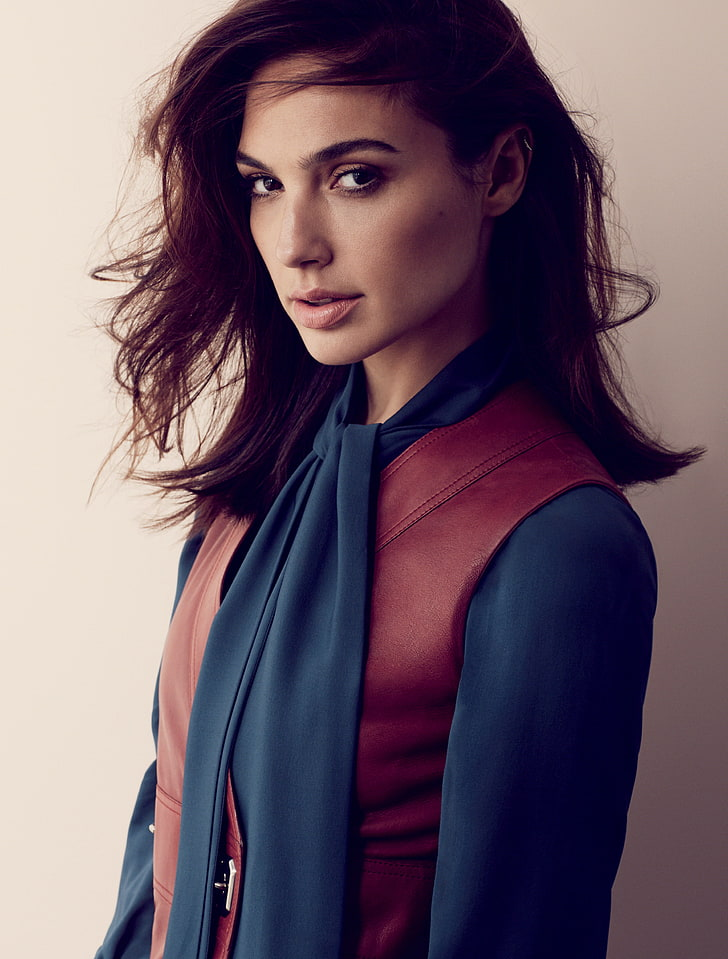

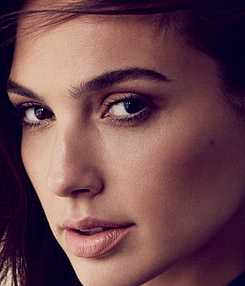

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

model = cv.FaceDetectorYN.create(
            model='/content/face_detection_yunet_2022mar.onnx',
            config="",
            input_size=[320, 320],
            score_threshold=0.9,
            nms_threshold=0.3,
            top_k=5000,
            backend_id=3,
            target_id=0)
img = cv.imread('/content/gal-gadot-6.jpg')
h, w, _ = img.shape
model.setInputSize((w, h))
faces = model.detect(img)[1]




output = img.copy()
for det in (faces if faces is not None else []):
    bbox = det[0:4].astype(np.int32)
    left_x = bbox[0]
    left_y = bbox[1]
    right_x = bbox[0] + bbox[2]
    right_y = bbox[1] + bbox[3]
    face = output[left_y:right_y, left_x:right_x]
    cv2_imshow(face)